<a href="https://colab.research.google.com/github/choiking10/kaggle-competition/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tatatic

## Competition
[Titanic-Machine Learning from Disaster - overview](https://www.kaggle.com/c/titanic/overview)

Overview
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Reference

[데이터 사이언스 스쿨 - 2.1 데이터 전처리 기초](https://datascienceschool.net/03%20machine%20learning/02.01%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html)  
[[이유한님] 캐글 코리아 캐글 스터디 커널 커리큘럼](https://kaggle-kr.tistory.com/32)  
[타이타닉 튜토리얼 1](https://kaggle-kr.tistory.com/17?category=868316)  
[타이타닉 튜토리얼 2](https://kaggle-kr.tistory.com/18?category=868316)


# Kaggle setup

In [ ]:
!pip install kaggle
from google.colab import files

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


# upload api token (kaggle.json)
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Prevent Permission Warning 
!chmod 600 ~/.kaggle/kaggle.json

# Dataset Download
! kaggle competitions download -c titanic


Saving kaggle.json to kaggle.json
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 5.26MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 54.9MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.2MB/s]


# Titanic Data Overview


## Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Check Missing Data

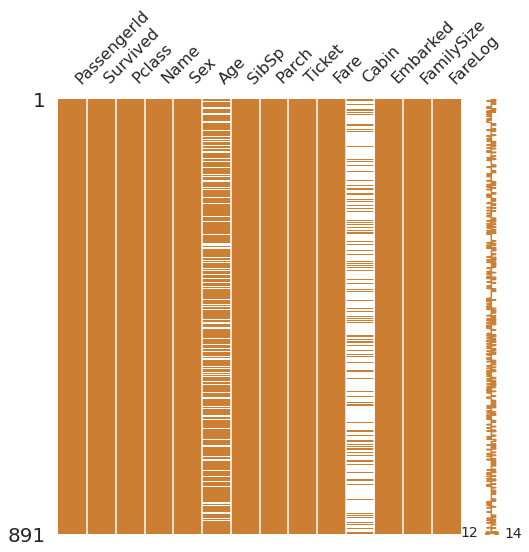

In [ ]:
import missingno as msno

msno.matrix(df=train_data, figsize=(8, 8), color=(0.8, 0.5, 0.2))


In [56]:
pd.DataFrame(train_data.isnull().sum().where(lambda x: x!=0).dropna(), columns=["train_missing"])

,train_missing
Age,177.0
Cabin,687.0
Embarked,2.0


In [55]:
pd.DataFrame(test_data.isnull().sum().where(lambda x: x!=0).dropna(), columns=["test_missing"])

,missing
Age,86.0
Fare,1.0
Cabin,327.0


## Data Distribution


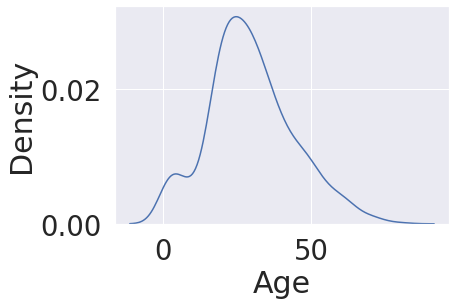

In [ ]:
import seaborn as sns

sns.kdeplot(train_data.Age)

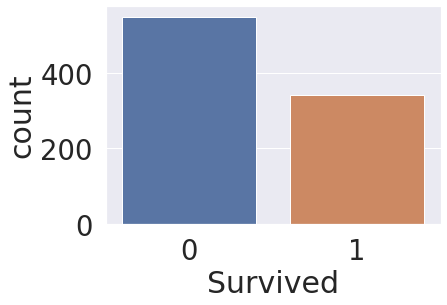

In [ ]:
sns.countplot(train_data.Survived)

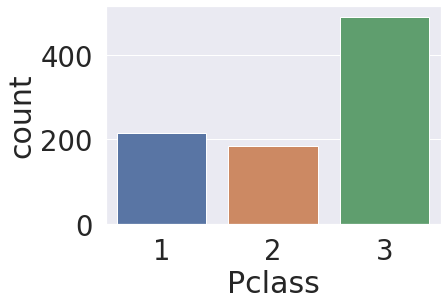

In [ ]:
sns.countplot(train_data.Pclass)

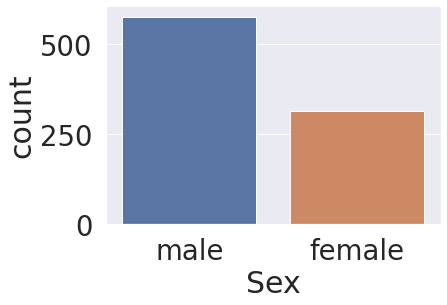

In [ ]:
sns.countplot(train_data.Sex)

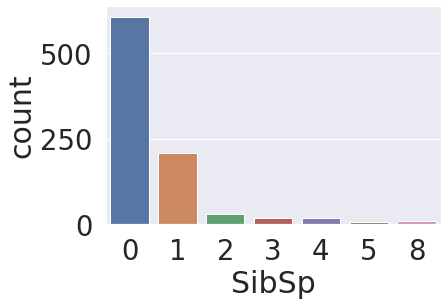

In [ ]:
sns.countplot(train_data.SibSp)

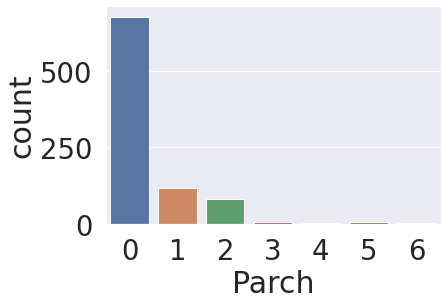

In [ ]:
sns.countplot(train_data.Parch)

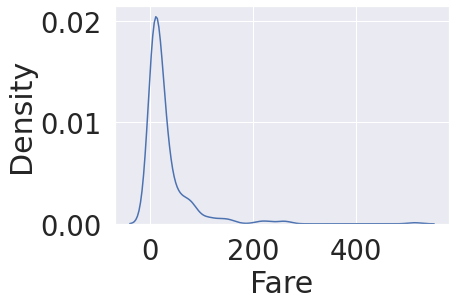

In [ ]:
sns.kdeplot(train_data.Fare)

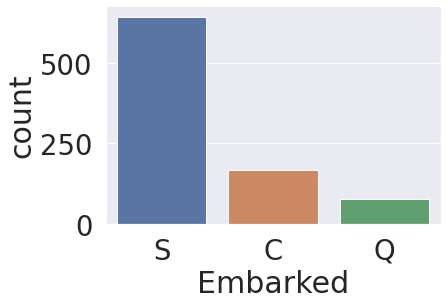

In [ ]:
sns.countplot(train_data.Embarked)

In [ ]:
train_data["Ticket"].str.extract(r"([a-zA-Z0-9]+)$").nunique()

0    679
dtype: int64

## Data Correlation

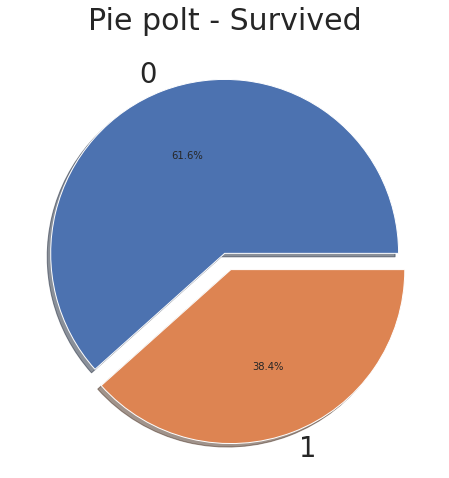

In [ ]:
# f, ax = plt.subplots(1, figsize=(8, 8))

train_data["Survived"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', figsize=(8,8),shadow=True, title="Pie polt - Survived", ylabel="")


In [ ]:
train_data[['Pclass', 'Survived']].groupby(["Pclass"], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
pd.crosstab(train_data["Pclass"], train_data["Survived"], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


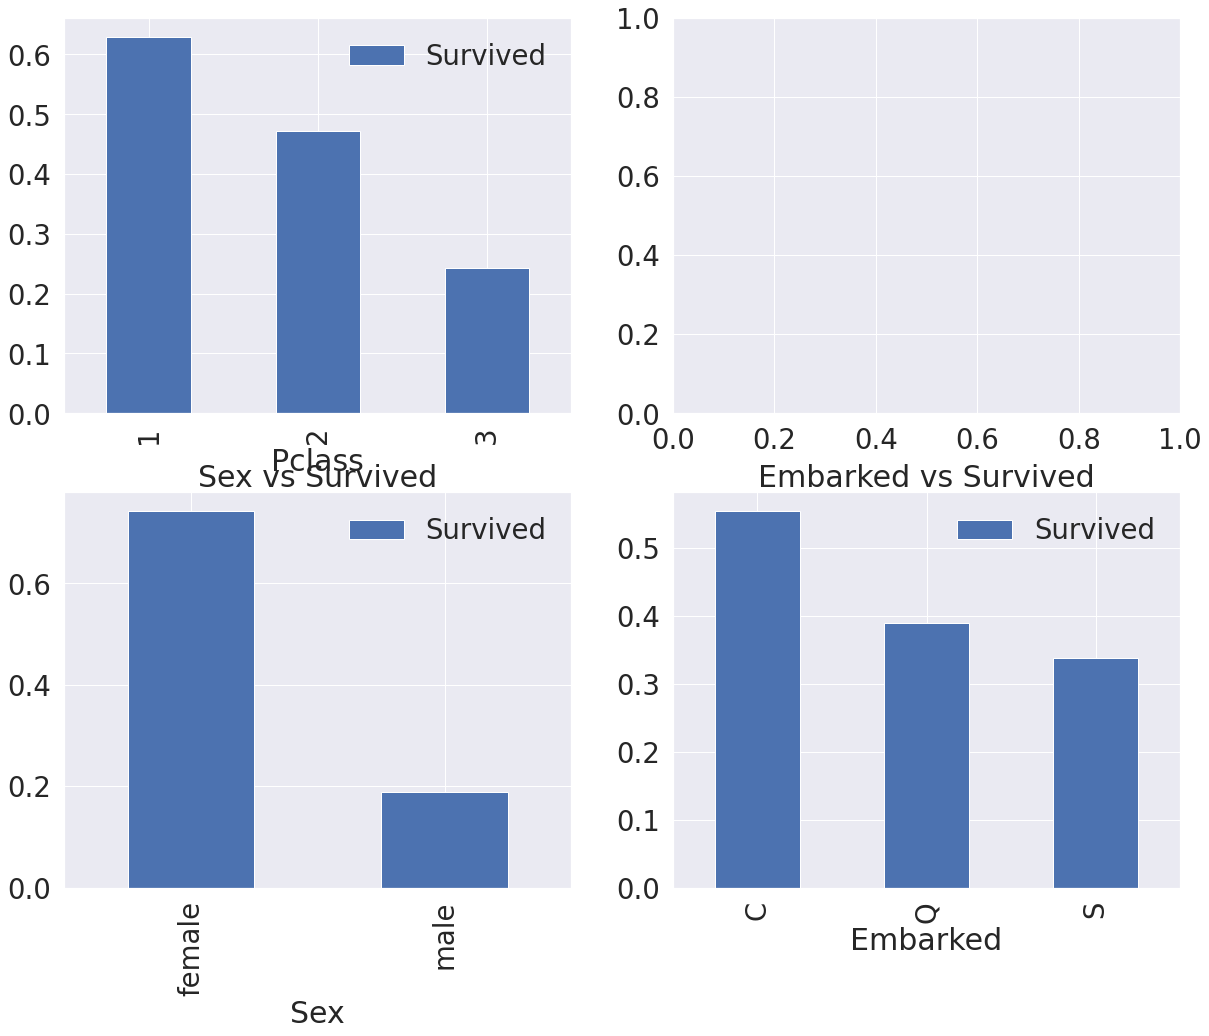

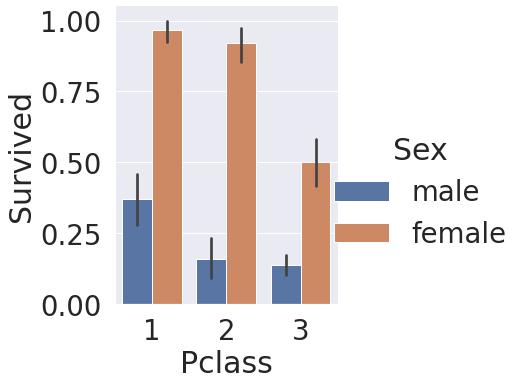

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20, 16))

# sns.countplot('Sex', hue='Survived', data=train_data,ax=ax[0, 0])
# ax[0, 0].set_title("Sex: Dead vs Survived")

# sns.countplot('Embarked', hue="Survived", data=train_data, ax=ax[0, 1])
# ax[0, 1].set_title("Embarked: Dead vs Survived")

# 이거가 중요한 insight 각 Column 별로 상관관계를 분석 가능
train_data[["Pclass", "Survived"]].groupby("Pclass", as_index=True).mean().sort_values("Survived", ascending=False).plot.bar(ax=ax[0, 0])
# 이거가 중요한 insight 각 Column 별로 상관관계를 분석 가능
ax[0, 1] = sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=train_data)
# sns.barplot(train_data[["Sex", "Pclass", "Survived"]].groupby(["Sex", "Pclass"], as_index=True).mean(), hue="Sex", ax=ax[0, 1])
# 모두 불균형이 어느정도 있음
#
train_data[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean().sort_values("Survived", ascending=False).plot.bar(ax=ax[1, 0])
ax[1, 0].set_title("Sex vs Survived")
train_data[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().sort_values("Survived", ascending=False).plot.bar(ax=ax[1, 1])
ax[1, 1].set_title("Embarked vs Survived")
f.show()

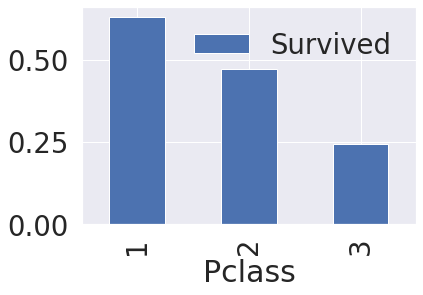

In [ ]:
train_data[["Pclass", "Survived"]].groupby("Pclass").mean().plot.bar()

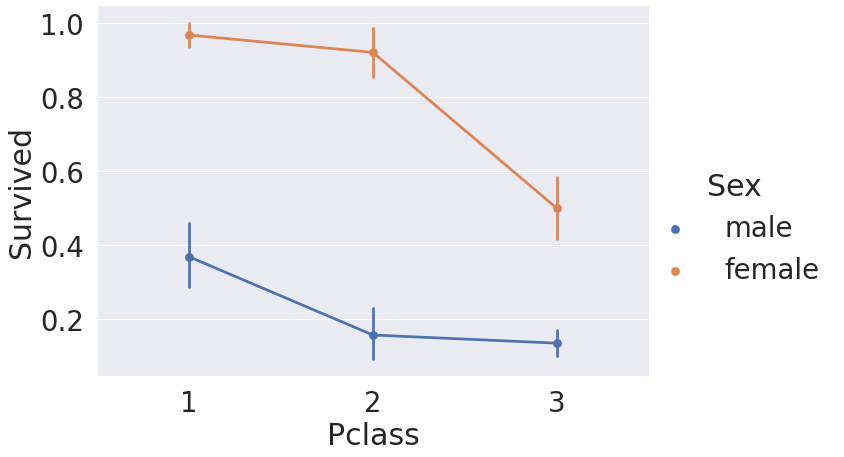

In [ ]:
sns.factorplot('Pclass', 'Survived', hue="Sex", data=train_data, size=6, aspect=1.5)

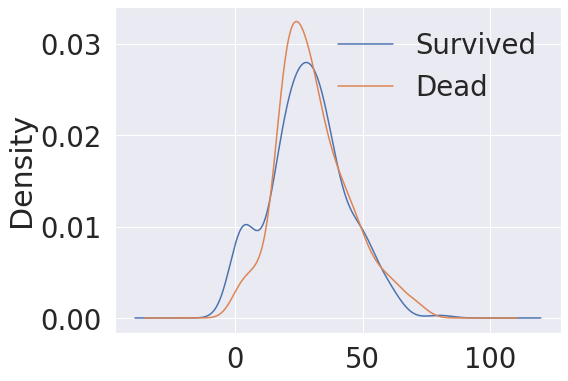

In [ ]:
plt.figure(figsize=(8, 6))

train_data[train_data["Survived"]==1]["Age"].plot(kind='kde')
train_data[train_data["Survived"]==0]["Age"].plot(kind='kde')

plt.legend(['Survived', 'Dead'])

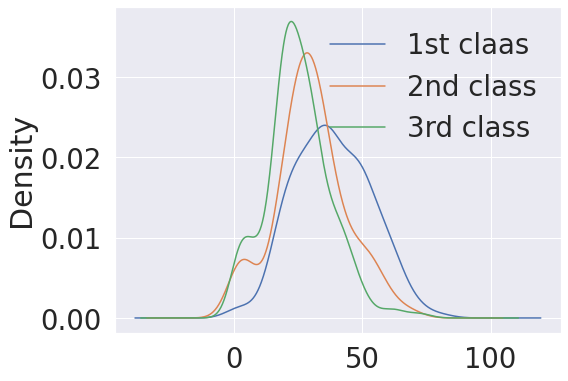

In [ ]:
plt.figure(figsize=(8, 6))

train_data[train_data["Pclass"]==1]["Age"].plot(kind='kde')
train_data[train_data["Pclass"]==2]["Age"].plot(kind='kde')
train_data[train_data["Pclass"]==3]["Age"].plot(kind='kde')

plt.legend(['1st claas', '2nd class', '3rd class'])

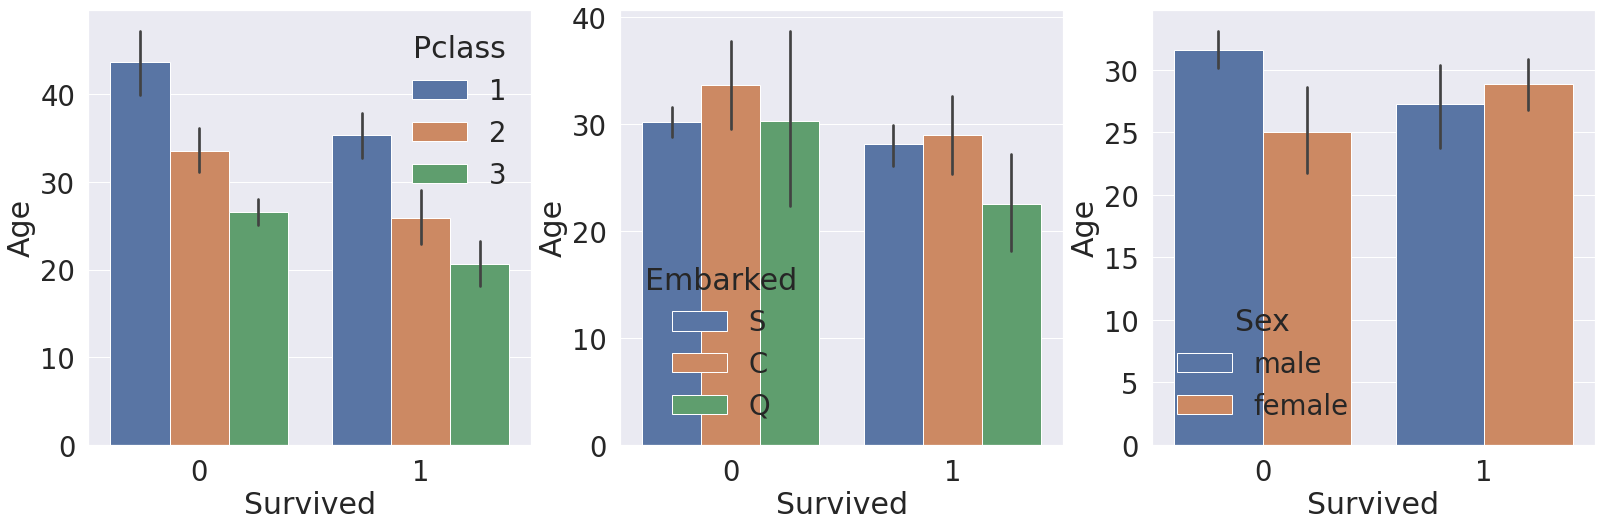

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(27, 8))
sns.barplot("Survived", "Age", hue="Pclass", data=train_data, ax=ax[0])
# sns.violinplot("Embarked", "Age", hue="Survived", data=train_data, ax=ax[1], split=True)
sns.barplot("Survived", "Age", hue="Embarked", data=train_data, ax=ax[1])
sns.barplot("Survived", "Age", hue="Sex", data=train_data, ax=ax[2])

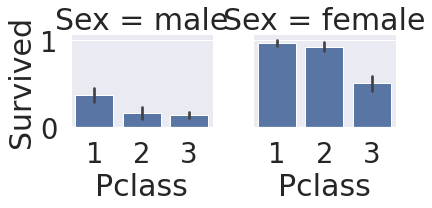

In [ ]:
g = sns.FacetGrid(train_data, col="Sex")
g.map(sns.barplot, "Pclass", "Survived")

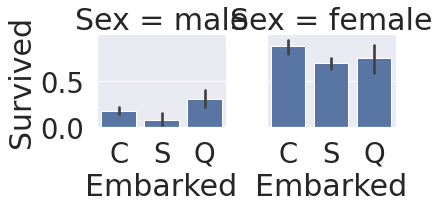

In [ ]:
g = sns.FacetGrid(train_data, col="Sex")
g.map(sns.barplot, "Embarked", "Survived")

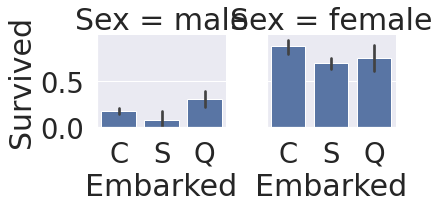

In [ ]:
g = sns.FacetGrid(train_data, col="Sex")
g.map(sns.barplot, "Embarked", "Survived")

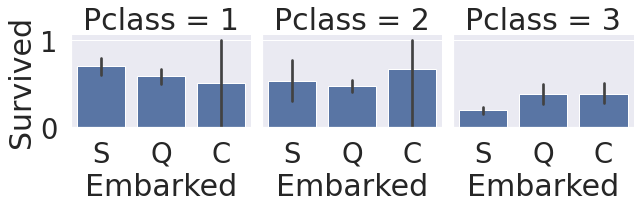

In [ ]:
g = sns.FacetGrid(train_data, col="Pclass")
g.map(sns.barplot, "Embarked", "Survived")

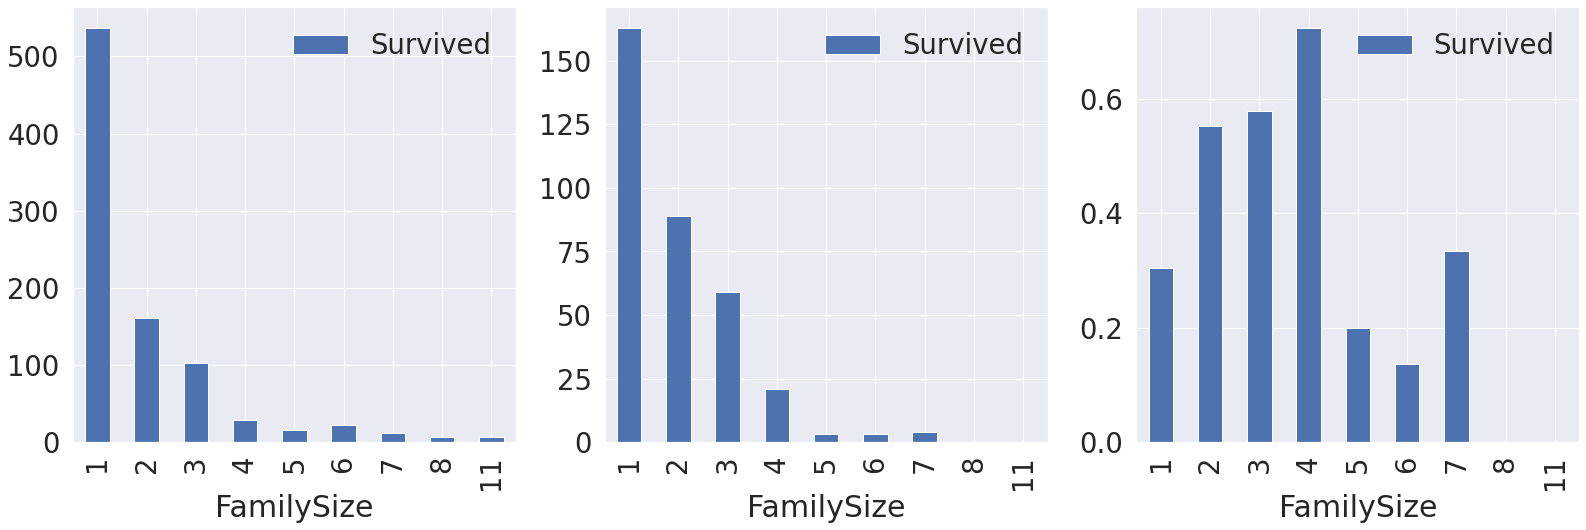

In [ ]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

f, ax = plt.subplots(1, 3, figsize=(27, 8))
train_data[['FamilySize', 'Survived']].groupby("FamilySize", as_index=True).count().plot.bar(ax=ax[0])
train_data[['FamilySize', 'Survived']].groupby("FamilySize", as_index=True).sum().plot.bar(ax=ax[1])
train_data[['FamilySize', 'Survived']].groupby("FamilySize", as_index=True).mean().plot.bar(ax=ax[2])

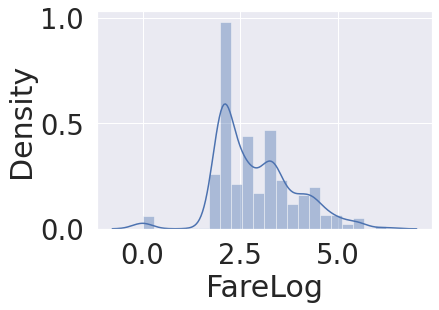

In [ ]:
import numpy as np
train_data['FareLog'] = train_data["Fare"].map(lambda x: np.log(x) if x > 0 else 0)
sns.distplot(train_data['FareLog'])

# Feature Engineering



## Data Cleansing

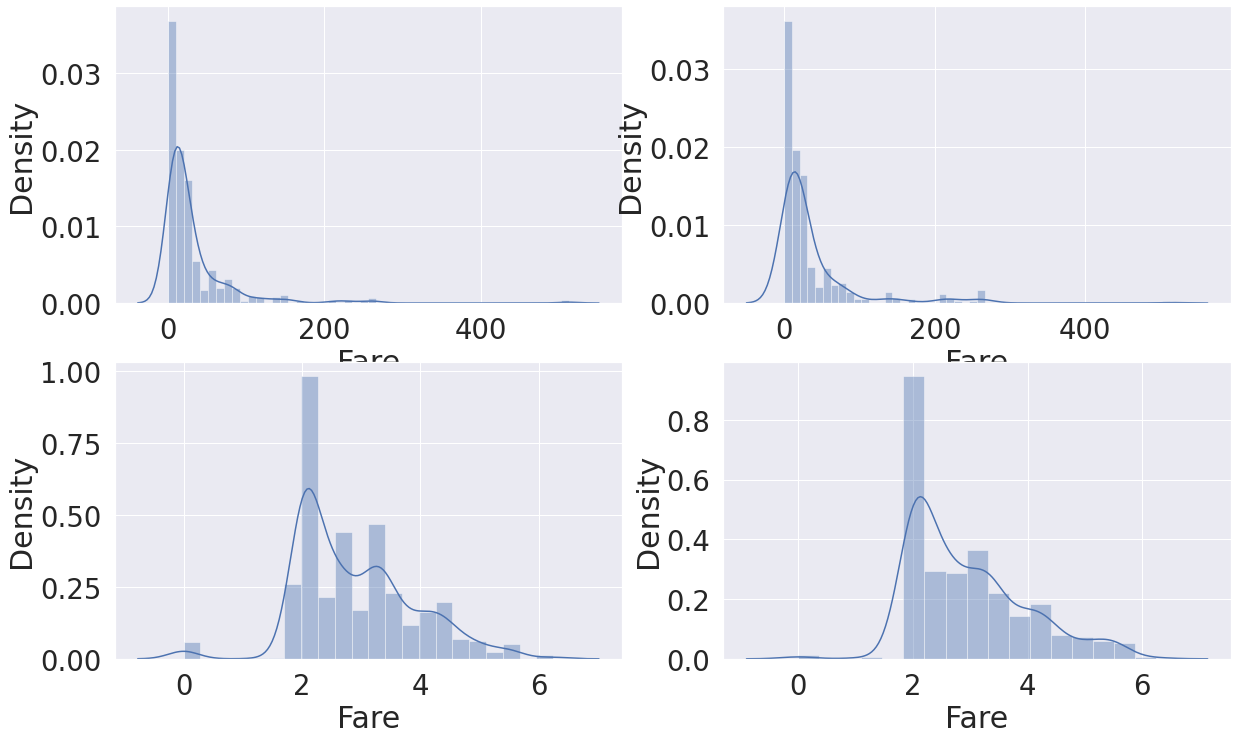

In [64]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

def cleaning(df):
  df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
  df["Fare"][df["Fare"].isnull()] = df['Fare'].mean()
  df["Fare"] = df["Fare"].map(lambda x: np.log(x) if x > 0 else 0)
  return df

f, ax = plt.subplots(2, 2, figsize=(20, 12))

sns.distplot(df_train.Fare, ax=ax[0, 0])
sns.distplot(df_test.Fare, ax=ax[0, 1])

df_train = cleaning(df_train)
df_test = cleaning(df_test)

sns.distplot(df_train.Fare, ax=ax[1, 0])
sns.distplot(df_test.Fare, ax=ax[1, 1])

f.show()

In [ ]:

# 
# scaler = StandardScaler()
# train["Age"] = scaler.fit_transform(cleaned_train_data["Age"].values.reshape(-1, 1))

# train